In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import json
import csv

### The following cells show the result of pose estimation based on different image resolution. 

Basically, the image resolutions are ranging from 80x80 to 496x496, all multiples of 16.

The result data is located in folder 'step1'

In [20]:
col_info = ['model', 'cocoyear', 'resolution', 'round', 'time_elapsed',
            'AP1', 'AP2', 'AP3', 'AP4', 'AP5', 'AR1', 'AR2', 'AR3', 'AR4', 'AR5']
df = pd.DataFrame(columns=col_info)

In [21]:
for i in range(5,32):
    res = i*16
    resolution = str(res)+'x'+str(res)
    filename = './step1/estimation_result_cmu_coco2017_%s.csv' % resolution

    with open(filename) as f:
        reader = csv.reader(f)
        round = 1
        for row in reader:
            precision_and_recall = row[0:10]
            time_elapsed = float(row[10])
            df = df.append(pd.Series(['cmu', 2017, res, round, time_elapsed,
                                      float(precision_and_recall[0]),
                                      float(precision_and_recall[1]),
                                      float(precision_and_recall[2]),
                                      float(precision_and_recall[3]),
                                      float(precision_and_recall[4]),
                                      float(precision_and_recall[5]),
                                      float(precision_and_recall[6]),
                                      float(precision_and_recall[7]),
                                      float(precision_and_recall[8]),
                                      float(precision_and_recall[9])], index=df.columns), ignore_index=True)
            round +=1

df

model cocoyear resolution round  time_elapsed       AP1       AP2  \
0     cmu     2017         80     1     93.978763  0.051130  0.126835   
1     cmu     2017         80     2     94.974834  0.051130  0.126835   
2     cmu     2017         80     3     94.269298  0.051130  0.126835   
3     cmu     2017         80     4     94.502404  0.051130  0.126835   
4     cmu     2017         80     5     95.201334  0.051130  0.126835   
..    ...      ...        ...   ...           ...       ...       ...   
265   cmu     2017        496     6    428.543510  0.441225  0.720170   
266   cmu     2017        496     7    428.181316  0.441225  0.720170   
267   cmu     2017        496     8    428.393865  0.441225  0.720170   
268   cmu     2017        496     9    429.243396  0.441225  0.720170   
269   cmu     2017        496    10    429.696643  0.441225  0.720170   

          AP3       AP4       AP5       AR1       AR2       AR3       AR4  \
0    0.033459  0.001320  0.115380  0.067144  0.148772  0.052739  0.000164   
1    0.033459  0.001320  0.115380  0.067144  0.148772  0.052739  0.000164   
2    0.033459  0.001320  0.115380  0.067144  0.148772  0.052739  0.000164   
3    0.033459  0.001320  0.115380  0.067144  0.148772  0.052739  0.000164   
4    0.033459  0.001320  0.115380  0.067144  0.148772  0.052739  0.000164   
..        ...       ...       ...       ...       ...       ...       ...   
265  0.449806  0.412471  0.479092  0.498945  0.740554  0.519364  0.421087   
266  0.449806  0.412471  0.479092  0.498945  0.740554  0.519364  0.421087   
267  0.449806  0.412471  0.479092  0.498945  0.740554  0.519364  0.421087   
268  0.449806  0.412471  0.479092  0.498945  0.740554  0.519364  0.421087   
269  0.449806  0.412471  0.479092  0.498945  0.740554  0.519364  0.421087   

          AR5  
0    0.158268  
1    0.158268  
2    0.158268  
3    0.158268  
4    0.158268  
..        ...  
265  0.608956  
266  0.608956  
267  0.608956  
268  0.608956  
269  0.608956  

[270 rows x 15 columns]

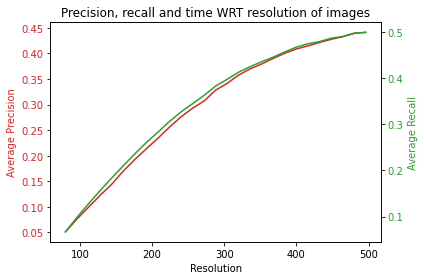

<Figure size 6000x2000 with 0 Axes>

The unit of 'Time elapsed' is second.


In [30]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_title('Precision, recall and time WRT resolution of images')
ax1.set_xlabel('Resolution')
ax1.set_ylabel('Average Precision', color=color)
ax1.plot((df.loc[df['round']==1])['resolution'], (df.loc[df['round']==1])['AP1'], color=color) # Here I only plot the first Average Precision
ax1.tick_params(axis='y', labelcolor=color)

# ax2 = ax1.twinx()
# color = 'tab:blue'
# ax2.set_ylabel('Time Elapsed', color=color)
# ax2.plot(df['resolution'], df['time_elapsed'], color=color)
# ax2.tick_params(axis='y', labelcolor=color)
# ax2.spines["right"].set_position(("axes", 1.2))

ax3 = ax1.twinx()
color = 'tab:green'
ax3.set_ylabel('Average Recall', color=color)
ax3.plot((df.loc[df['round']==1])['resolution'], (df.loc[df['round']==1])['AR1'], color=color) # here I only plot the first Average Recall
ax3.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.figure(figsize=[30,10],dpi=200)
plt.show()

print('The unit of \'Time elapsed\' is second.')

<Figure size 8000x2000 with 0 Axes>

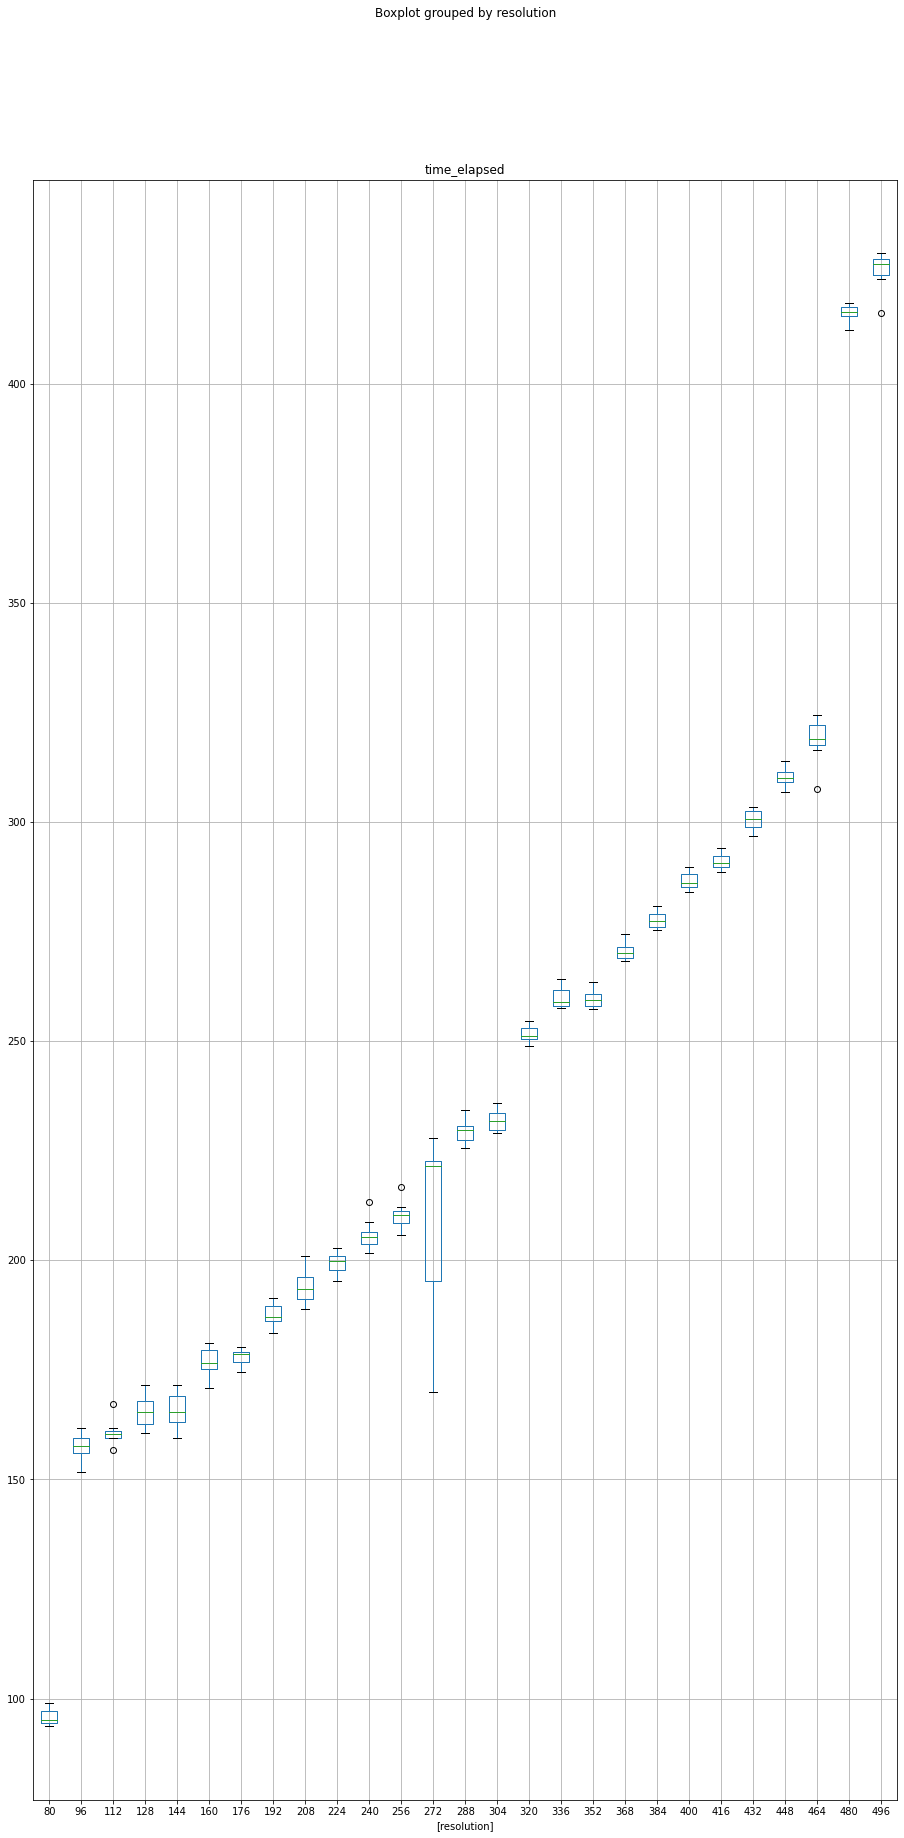

In [47]:
plt.figure(figsize=[40,10],dpi=200)
boxplot = df[['resolution','time_elapsed','round']].boxplot(by='resolution', figsize=(15,30))
plt.show()

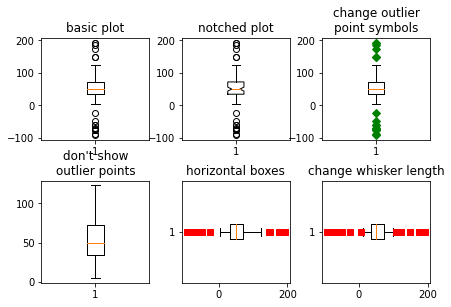

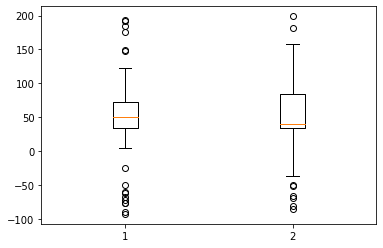

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon


# Fixing random state for reproducibility
np.random.seed(19680801)

# fake up some data
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = list(np.concatenate((spread, center, flier_high, flier_low)))


fig, axs = plt.subplots(2, 3)

# basic plot
axs[0, 0].boxplot(data)
axs[0, 0].set_title('basic plot')

# notched plot
axs[0, 1].boxplot(data, 1)
axs[0, 1].set_title('notched plot')

# change outlier point symbols
axs[0, 2].boxplot(data, 0, 'gD')
axs[0, 2].set_title('change outlier\npoint symbols')

# don't show outlier points
axs[1, 0].boxplot(data, 0, '')
axs[1, 0].set_title("don't show\noutlier points")

# horizontal boxes
axs[1, 1].boxplot(data, 0, 'rs', 0)
axs[1, 1].set_title('horizontal boxes')

# change whisker length
axs[1, 2].boxplot(data, 0, 'rs', 0, 0.75)
axs[1, 2].set_title('change whisker length')

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)

# fake up some more data
spread = np.random.rand(50) * 100
center = np.ones(25) * 40
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
d2 = np.concatenate((spread, center, flier_high, flier_low))
#data.shape = (-1, 1)
#d2.shape = (-1, 1)
# Making a 2-D array only works if all the columns are the
# same length.  If they are not, then use a list instead.
# This is actually more efficient because boxplot converts
# a 2-D array into a list of vectors internally anyway.
data = [data, list(d2)]

# Multiple box plots on one Axes
fig, ax = plt.subplots()
ax.boxplot(data)

plt.show()

### Next Step: Running face detection on the COCO Dataset.

The model has a parameter called `number_of_times_to_upsample` – It determines how many times to upsample the image looking for faces. Higher numbers find smaller faces. I can only run the model with maximum `number_of_times_to_upsample` of 2. If higher, it will report a "out of memory" error.

Since the upsample can only be 0, 1, or 2, I hardcoded the result in the following cell.

The result data is in the folder 'step2'

In [7]:
#face_detected: how many faces does the model detect after running through the dataset
face_detected = [537,1372,2487]
time_consumed = [27.789, 94.746, 355.008]
upsample = [0,1,2]


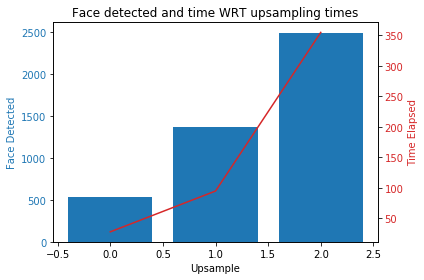

<Figure size 6000x2000 with 0 Axes>

The unit of 'Time elapsed' is second.


In [8]:
#Plotting the data
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_title('Face detected and time WRT upsampling times')
ax1.set_xlabel('Upsample')
ax1.set_ylabel('Face Detected', color=color)
ax1.bar(upsample, face_detected, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Time Elapsed', color=color)
ax2.plot(upsample, time_consumed, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.figure(figsize=[30,10],dpi=200)
plt.show()

print('The unit of \'Time elapsed\' is second.')

### Next Step: Blur the faces in the dataset using Gaussian Blur. Then run pose estimation again on blurred dataset.

The Gaussian Blur algorithm has a parameter called `radius`, the higher the value, the more the image is blurred

The following cells show the result of pose estimation on datasets that are blurred with different `radius` value(ranging from 1 to 15).

The pose estimation model used here is cmu model, with resolution of 432x368, which is the default resolution.

The result data is located in folder 'step3'

In [9]:
col_info_2 = ['blur_radius', 'time_elapsed', 'AP1', 'AP2', 'AP3', 'AP4', 'AP5', 'AR1', 'AR2', 'AR3', 'AR4', 'AR5']
df2 = pd.DataFrame(columns=col_info_2)
for i in range(1,16):
    filename = './step3/cmu_0x0_2_%s_pr.json' % str(i)
    with open(filename) as f:
        data = f.readline()
        data = data.split('"')
        time_elapsed = float(data[2])
        precision_and_recall = []
        temp = data[1].split()
        for item in temp:
            if item != '|':
                precision_and_recall.append(float(item))
        df2 = df2.append(pd.Series([i, time_elapsed,
                                    precision_and_recall[0],
                                    precision_and_recall[1],
                                    precision_and_recall[2],
                                    precision_and_recall[3],
                                    precision_and_recall[4],
                                    precision_and_recall[5],
                                    precision_and_recall[6],
                                    precision_and_recall[7],
                                    precision_and_recall[8],
                                    precision_and_recall[9]], index=df2.columns), ignore_index=True)
df2

blur_radius  time_elapsed     AP1     AP2     AP3     AP4     AP5     AR1  \
0           1.0    534.634475  0.4794  0.7446  0.4996  0.4593  0.5036  0.5396   
1           2.0    416.876951  0.4590  0.7336  0.4750  0.4380  0.4879  0.5205   
2           3.0    416.887836  0.4338  0.7223  0.4397  0.4150  0.4568  0.4976   
3           4.0    417.604133  0.4185  0.7110  0.4179  0.4062  0.4273  0.4817   
4           5.0    427.167070  0.4072  0.7009  0.4044  0.4021  0.4064  0.4708   
5           6.0    433.241194  0.4014  0.6993  0.3951  0.4003  0.3924  0.4638   
6           7.0    431.255104  0.3970  0.6908  0.3869  0.4003  0.3843  0.4595   
7           8.0    428.697174  0.3945  0.6899  0.3868  0.4014  0.3764  0.4561   
8           9.0    430.347811  0.3948  0.6890  0.3874  0.4024  0.3722  0.4548   
9          10.0    432.356149  0.3929  0.6807  0.3818  0.4024  0.3702  0.4534   
10         11.0    541.924444  0.3952  0.6802  0.3908  0.4052  0.3714  0.4541   
11         12.0    428.489570  0.3955  0.6802  0.3916  0.4050  0.3719  0.4543   
12         13.0    427.484025  0.3948  0.6804  0.3923  0.4061  0.3719  0.4545   
13         14.0    436.706785  0.3959  0.6800  0.3928  0.4072  0.3716  0.4541   
14         15.0    432.214961  0.3957  0.6803  0.3938  0.4073  0.3723  0.4547   

       AR2     AR3     AR4     AR5  
0   0.7683  0.5636  0.4735  0.6347  
1   0.7546  0.5422  0.4492  0.6223  
2   0.7435  0.5137  0.4267  0.5986  
3   0.7333  0.4943  0.4170  0.5736  
4   0.7258  0.4814  0.4129  0.5528  
5   0.7207  0.4739  0.4110  0.5388  
6   0.7179  0.4665  0.4111  0.5283  
7   0.7146  0.4639  0.4120  0.5190  
8   0.7106  0.4605  0.4128  0.5147  
9   0.7091  0.4595  0.4134  0.5108  
10  0.7061  0.4636  0.4155  0.5096  
11  0.7056  0.4641  0.4155  0.5100  
12  0.7061  0.4635  0.4165  0.5092  
13  0.7034  0.4635  0.4166  0.5081  
14  0.7042  0.4649  0.4177  0.5079

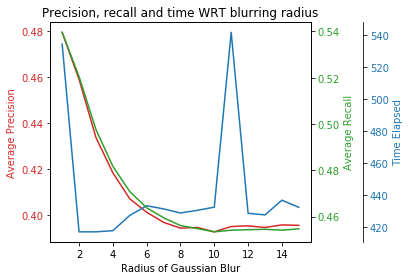

<Figure size 6000x2000 with 0 Axes>

The unit of 'Time elapsed' is second.


In [10]:
#Plotting the data
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_title('Precision, recall and time WRT blurring radius')
ax1.set_xlabel('Radius of Gaussian Blur')
ax1.set_ylabel('Average Precision', color=color)
ax1.plot(df2['blur_radius'], df2['AP1'], color=color) #Similarly, only AP1 is plotted
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Time Elapsed', color=color)
ax2.plot(df2['blur_radius'], df2['time_elapsed'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.spines["right"].set_position(("axes", 1.2))
ax3 = ax1.twinx()
color = 'tab:green'
ax3.set_ylabel('Average Recall', color=color)
ax3.plot(df2['blur_radius'], df2['AR1'], color=color) #Only AR1 is plotted
ax3.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.figure(figsize=[30,10],dpi=200)
plt.show()

print('The unit of \'Time elapsed\' is second.')

### Next Step: Run face detection model on blurred datasets

After the datasets being blurred with different `radius`, run the face detection model again to see how many faces it still can detect.

The face detection model uses value of 2 on `number_of_times_to_upsample`.

`radius`: ranging from 1 to 15

The result data is located in folder 'step4'

In [11]:
col_info_3 = ['radius', 'time_elapsed', 'face_detected']
df3 = pd.DataFrame(columns=col_info_3)
for i in range(1,16):
    filename = './step4/time_report_upsample_2_radius_%s.json' % str(i)
    with open(filename) as f:
        data = f.readline()
        data = data.split('.\\n')

        time_elapsed = float((data[0].split())[-1])
        face_detected = float(data[1].split('"')[0].split()[-1])
        
        df3 = df3.append(pd.Series([i, time_elapsed, face_detected], index=df3.columns), ignore_index=True)

df3

radius  time_elapsed  face_detected
0      1.0    347.115346         1788.0
1      2.0    345.804269         1043.0
2      3.0    347.274081          689.0
3      4.0    346.802418          465.0
4      5.0    346.321708          328.0
5      6.0    347.754167          228.0
6      7.0    348.488556          172.0
7      8.0    346.481029          137.0
8      9.0    366.334584          112.0
9     10.0    360.487055           84.0
10    11.0    358.699649           64.0
11    12.0    353.276102           53.0
12    13.0    345.538421           44.0
13    14.0    345.503964           41.0
14    15.0    345.363629           37.0

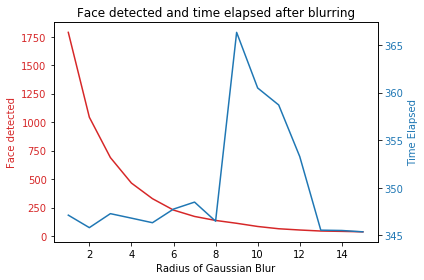

<Figure size 6000x2000 with 0 Axes>

The unit of 'Time elapsed' is second.


In [12]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_title('Face detected and time elapsed after blurring')
ax1.set_xlabel('Radius of Gaussian Blur')
ax1.set_ylabel('Face detected', color=color)
ax1.plot(df3['radius'], df3['face_detected'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Time Elapsed', color=color)
ax2.plot(df3['radius'], df3['time_elapsed'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.figure(figsize=[30,10],dpi=200)
plt.show()

print('The unit of \'Time elapsed\' is second.')